# **In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.**

# Tasks

1.Find the linear regression equation for this data for brain weight to body weight.

2.Chart the original data and the equation on the chart.

3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_fwf("brain_body.txt")

# Data Cleaning

In [3]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [5]:
df.shape

(62, 2)

In [6]:
df=df.drop_duplicates()

In [7]:
df.dtypes

Brain    float64
Body     float64
dtype: object

# Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


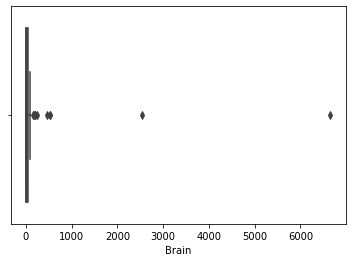

In [8]:
import seaborn as sns
sns.boxplot(df['Brain'])

In [9]:
percentile25 = df['Brain'].quantile(0.25)
percentile75 = df['Brain'].quantile(0.75)
iqr=percentile75 - percentile25
print("IQR is ",iqr)
print("25th Percentile of the Brain data--->",percentile25)
print("75th Percentile of the Brain data--->",percentile75)

IQR is  47.6025
25th Percentile of the Brain data---> 0.6000000000000001
75th Percentile of the Brain data---> 48.2025


In [10]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper_limit ----->",upper_limit)
print("lower_limit ----->",lower_limit)

upper_limit -----> 119.60625
lower_limit -----> -70.80375000000001


In [11]:
df.shape

(62, 2)

In [12]:
df['Brain'] = np.where(df['Brain']>upper_limit,upper_limit,df['Brain'])
df['Brain'] = np.where(df['Brain']<lower_limit,lower_limit,df['Brain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


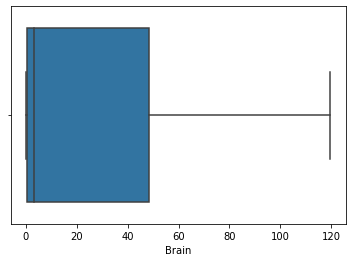

In [13]:
import seaborn as sns
sns.boxplot(df['Brain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


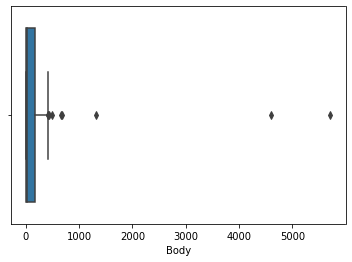

In [14]:
import seaborn as sns
sns.boxplot(df['Body'])

In [15]:
percentile25 = df['Body'].quantile(0.25)
percentile75 = df['Body'].quantile(0.75)
iqr=percentile75 - percentile25
print("IQR is ",iqr)
print("25th Percentile of the Body data--->",percentile25)
print("75th Percentile of the Body data--->",percentile75)

IQR is  161.75
25th Percentile of the Body data---> 4.25
75th Percentile of the Body data---> 166.0


In [16]:
upper_l = percentile75 + 1.5 * iqr
lower_l = percentile25 - 1.5 * iqr
print("upper_limit ----->",upper_l)
print("lower_limit ----->",lower_l)

upper_limit -----> 408.625
lower_limit -----> -238.375


In [17]:
df['Body'] = np.where(df['Body']>upper_l,upper_l,df['Body'])
df['Body'] = np.where(df['Body']<lower_l,lower_l,df['Body'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


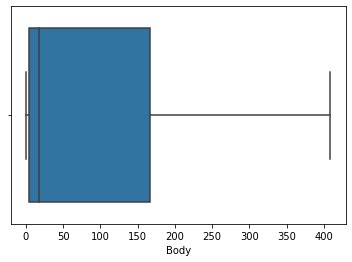

In [18]:
import seaborn as sns
sns.boxplot(df['Body'])

In [19]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


# EDA

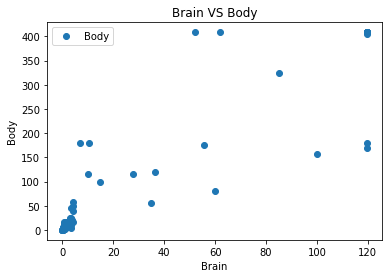

In [20]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain VS Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [21]:
df[['Brain','Body']].corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


# Splitting and Scalling

In [22]:
X = df[['Brain']].values 
y = df['Body'].values 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scalling

In [24]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Model Training

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
regressor.coef_

array([118.39541305])

In [27]:
regressor.intercept_

86.73593023255813

In [28]:
y_pred = regressor.predict(X_test_scaled)

# **The linear regression equation for this data.**

In [29]:
print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Brain_weight) + {regressor.intercept_} ")

regressor.intercept: 86.73593023255813
regressor.coef [118.39541305]
Linear Regression Equation y_pred = ([118.39541305] * Brain_weight) + 86.73593023255813 


# **2. Chart the original data and the equation on the chart.**

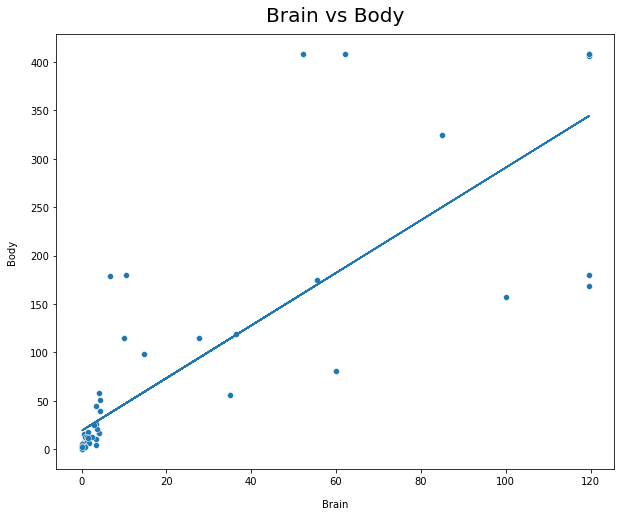

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Brain', y='Body', data=df)
plt.title("Brain vs Body", y=1.015, fontsize=20)
plt.xlabel("Brain", labelpad=13)
plt.ylabel("Body", labelpad=13)
ax = plt.gca()
plt.plot(X_test,regressor.predict(X_test_scaled))

# **3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [31]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7819152932422735
